In [6]:
%pip install gdown

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import gdown 
gdown.download('https://drive.google.com/uc?id=1_JUP1EYc4r1jgNpeLh7mMQxsKOsT-pcs', 'Invoices.csv')
gdown.download('https://drive.google.com/uc?id=1n6ePaU-cPfzhBKnSeGeynAxR9IYmCS0w', 'Customers.json')

Note: you may need to restart the kernel to use updated packages.


Downloading...
From: https://drive.google.com/uc?id=1_JUP1EYc4r1jgNpeLh7mMQxsKOsT-pcs
To: c:\Users\franz\Desktop\ITMGT\Invoices.csv
100%|██████████| 6.17M/6.17M [00:00<00:00, 10.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1n6ePaU-cPfzhBKnSeGeynAxR9IYmCS0w
To: c:\Users\franz\Desktop\ITMGT\Customers.json
100%|██████████| 342k/342k [00:00<00:00, 3.26MB/s]


'Customers.json'

Easy 1: How many unique customers are in the dataset 

In [19]:
invoices = pd.read_csv('Invoices.csv')
customers = pd.read_csv('Customers.csv')

unique_customers = invoices['customer_id'].nunique()
print("Number of unique customers: ", unique_customers)

Number of unique customers:  5191


Easy 2: What are the different categories of products available? How many unique categories are there?

In [17]:
invoices = pd.read_csv('Invoices.csv')
category = invoices['category'].unique()
print("Categories of products available:", category )
num_categories = invoices['category'].nunique()
print("Number of unique categories:", num_categories)

Categories of products available: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of unique categories: 8


Easy 3: Which payment method is the most popular? How many times was it used?

In [22]:
invoices = pd.read_csv('Invoices.csv')
payment_method = invoices['payment_method'].value_counts()
most_popular_payment = payment_method.idxmax()
most_popular_count = payment_method.max()
print("Most popular payment method:", most_popular_payment)
print("How many times it was used:", most_popular_count)

Most popular payment method: Cash
How many times it was used: 44447


Medium 1: What are the three most popular categories, by total sales?

In [12]:
invoices = pd.read_csv('Invoices.csv')
invoices['total_sales'] = invoices['quantity'] * invoices['price']
total_sales = invoices.groupby('category', dropna = False )['total_sales'].sum()
top3_category = total_sales.nlargest(3)
pd.set_option('display.float_format', '{:,.2f}'.format)
print("The 3 most popular categories:", top3_category)

The 3 most popular categories: category
Clothing     113,996,791.04
Shoes         66,553,451.47
Technology    57,862,350.00
Name: total_sales, dtype: float64


Medium 2: What are the total sales attributed to customers over the age of 45?

In [17]:
invoices = pd.read_csv('Invoices.csv')
customers = pd.read_json('Customers.json')

print("Invoices columns:", invoices.columns.tolist()) # check the column names in the Invoices.csv
customers = pd.read_json('Customers.json')  # check the column names in the Customers.json
print("Customers columns:" , customers.columns.tolist())

invoices['total_sales'] = invoices['quantity'] * invoices['price']
merged = pd.merge(invoices, customers, left_on='customer_id', right_on='id')
over_45 = merged[merged['age'] > 45]
total_sales45 = over_45['total_sales'].sum()

print("Total sales attributed to customers over the age of 45:", total_sales45)

Invoices columns: ['invoice_no', 'customer_id', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall']
Customers columns: ['age', 'first_name', 'gender', 'id', 'last_name']
Total sales attributed to customers over the age of 45: 82039768.15


Medium 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

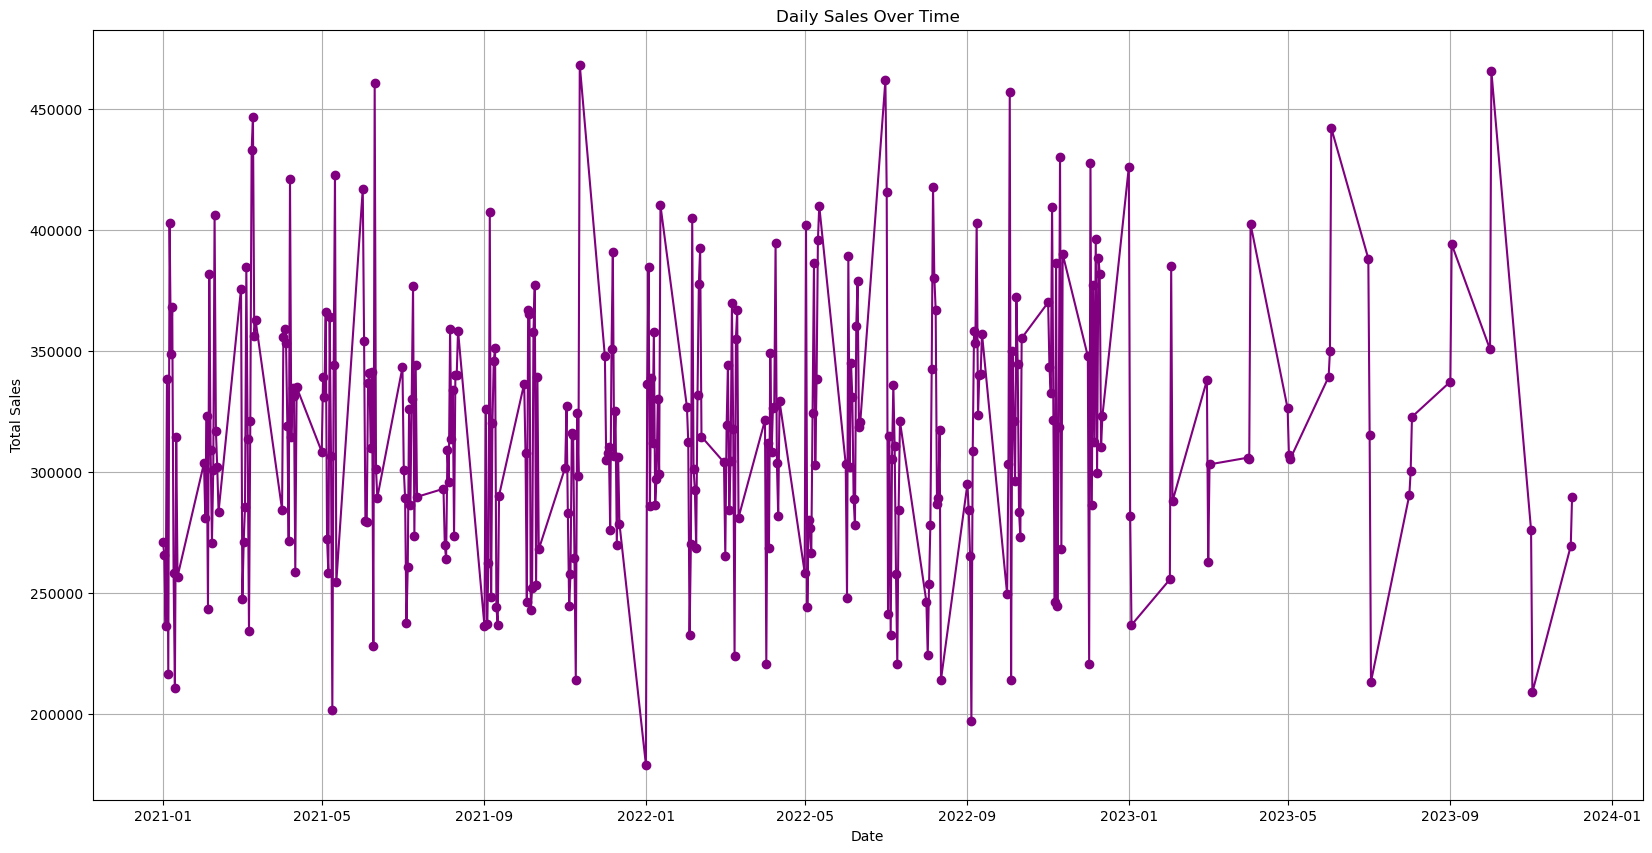

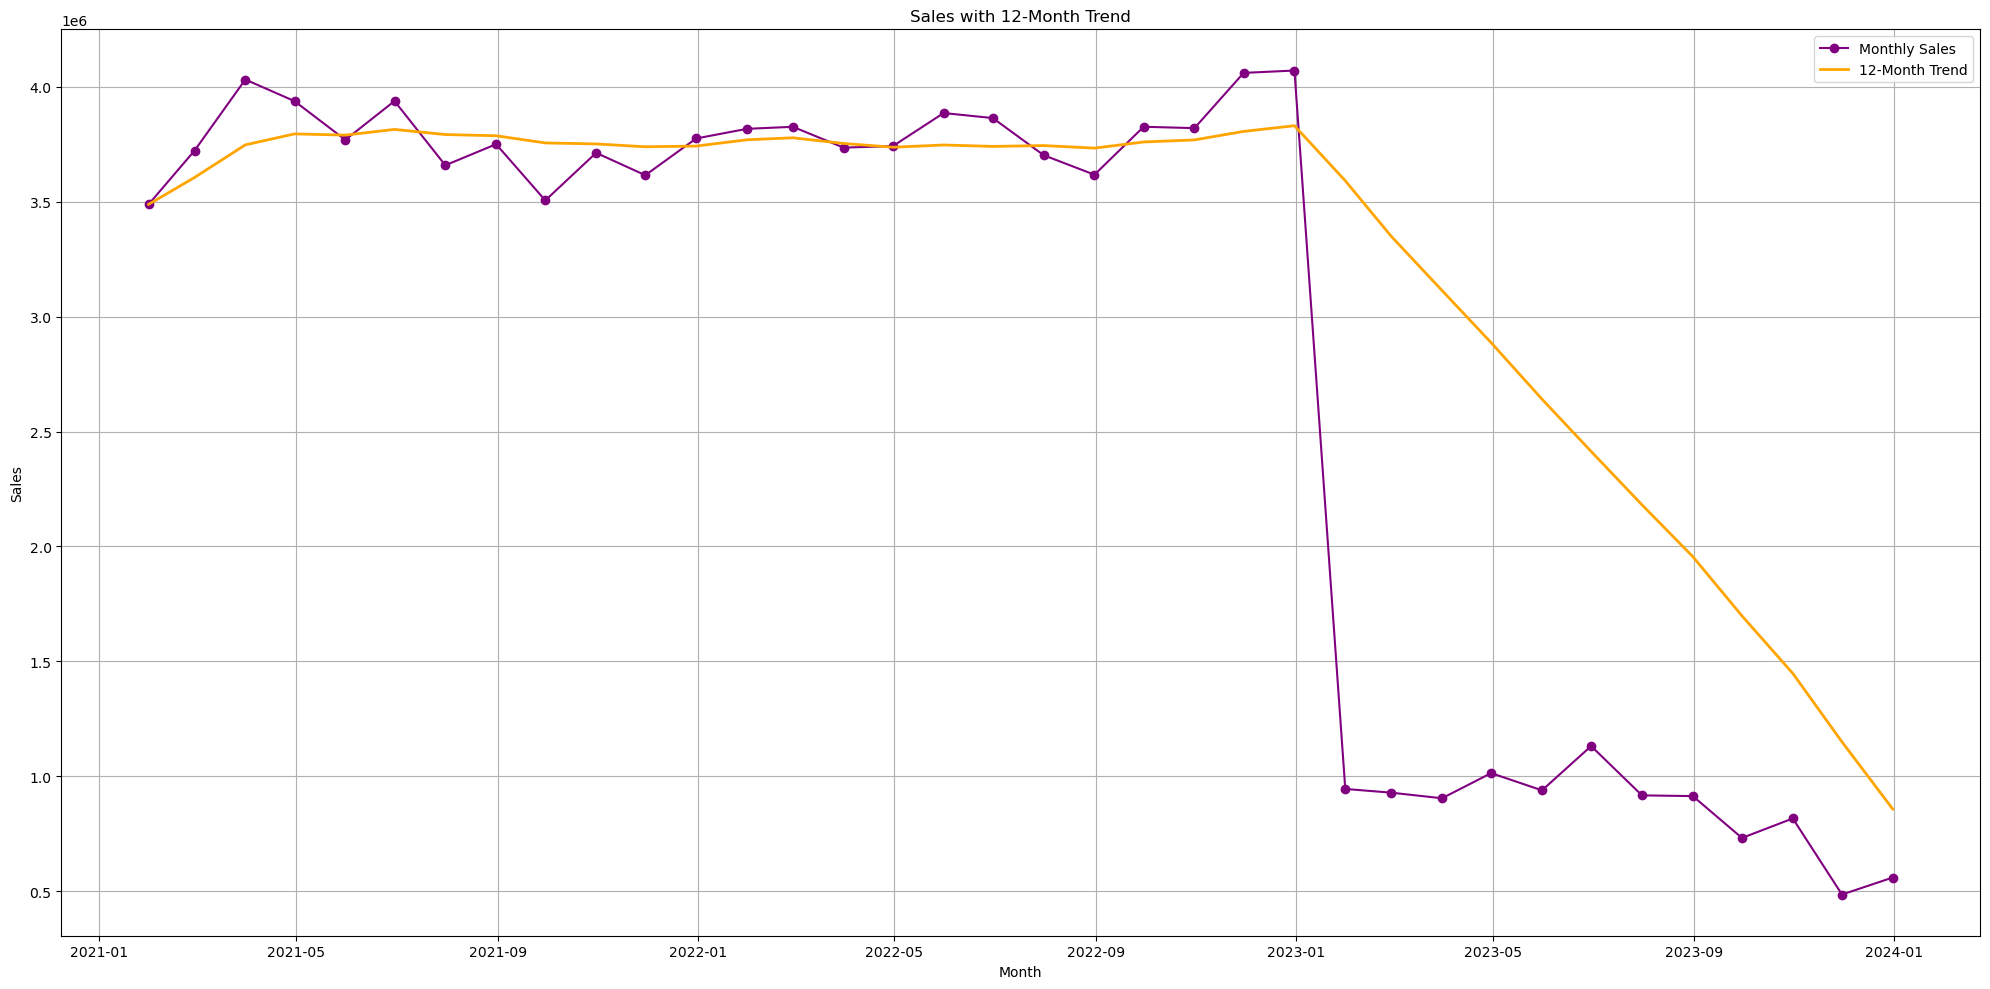

In [34]:
invoices = pd.read_csv("Invoices.csv")

invoices["invoice_date"] = pd.to_datetime(invoices["invoice_date"], errors="coerce")

invoices["sales"] = pd.to_numeric(invoices["quantity"], errors="coerce") * pd.to_numeric(invoices["price"], errors="coerce")

daily = (invoices
         .groupby(invoices["invoice_date"].dt.date)["sales"]
         .sum()
         .rename("daily_sales"))

daily.index = pd.to_datetime(daily.index)

monthly = (invoices
           .set_index("invoice_date")["sales"]
           .resample("ME") 
           .sum()
           .rename("monthly_sales"))

# plotting 
plt.figure(figsize=(20, 10))
plt.plot(daily.index, daily.values, marker='o', linestyle='-', color='purple')
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


# 12-month trend
trend_12m = monthly.rolling(12, min_periods=1).mean()

plt.figure(figsize=(20, 10))
plt.plot(monthly.index, monthly.values, marker="o", linestyle="-", label="Monthly Sales", color="purple")
plt.plot(trend_12m.index, trend_12m.values, linewidth=2, label="12-Month Trend", color="orange")

plt.title("Sales with 12-Month Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Hard: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [42]:
invoices = pd.read_csv("Invoices.csv")
customers = pd.read_json("Customers.json")

invoices['total_sales'] = invoices['quantity'] * invoices['price']

merged = pd.merge(invoices, customers, left_on='customer_id', right_on='id')

merged = merged.dropna(subset=['age'])

merged['age_decade'] = (merged['age'] // 10) * 10
merged['age_range'] = (
    merged['age_decade'].astype(int).astype(str) + "-" +
    (merged['age_decade'] + 9).astype(int).astype(str)
)

print(merged.columns)

pivot_table = pd.pivot_table(
    merged,
    index='category',
    columns='age_range',
    values='total_sales',
    aggfunc='sum', #sum of prices in each group
    fill_value=0, #fill NaN with 0
)

print(pivot_table)


Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall', 'total_sales', 'age',
       'first_name', 'gender', 'id', 'last_name', 'age_decade', 'age_range'],
      dtype='object')
age_range              10-19         20-29         30-39         40-49  \
category                                                                 
Books              12,801.75     79,461.75     84,143.10     87,203.40   
Clothing        1,927,413.84 10,250,732.80 11,354,126.96 11,215,189.92   
Cosmetics         109,619.36    605,915.32    723,544.70    665,034.96   
Food & Beverage    13,582.31     73,491.96     87,246.86     89,553.29   
Shoes             993,281.35  5,924,878.24  7,200,839.66  7,025,590.02   
Souvenir           12,375.15     54,943.32     64,092.72     66,391.80   
Technology      1,129,800.00  5,261,550.00  6,159,300.00  5,954,550.00   
Toys               60,426.24    385,100.80    420,582.40    390,906.88   

age_range 